In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/sample_data/Loan_dataset.csv')
df.head(5)

,S/N.,Gender,Branch,Region,Status,Economic_Sector,Product,Loan_Amount,Collateral,Collateral_Value,Tenure,Interest_Rate
0,1.0,Female,Yaba II,Mainland Region,Performing,Other(Assorted Drinks),(MSBS) MAINSTREET SAVE 'N BORROW SPECIAL,"500,000.00","TV, FRIDGE, GENERATOR, FREEZER","550,000.00",90.0,42.0
1,2.0,Female,Bariga,Island Region,Performing,Other(PROVISIONS),(MSBB) MAINSTREET SAVE 'N BORROW BASIC,"400,000.00","Freezer, Generator, Fridge and Television","450,000.00",60.0,42.0
2,3.0,Female,Mushin,Mainland Region,Performing,Other(PROVISIONS),(MSBB) MAINSTREET SAVE 'N BORROW BASIC,"200,000.00","GENERATOR, TV, FRIDGE","250,000.00",90.0,42.0
3,4.0,Male,Yaba,Mainland Region,Performing,Other(Textile Materials),(MSBB) MAINSTREET SAVE 'N BORROW BASIC,"100,000.00","GENERATOR, TV","120,000.00",30.0,42.0
4,5.0,Female,Ikotun,Mainland Region,Performing,Other(Drinks),(MSBB) MAINSTREET SAVE 'N BORROW BASIC,"50,000.00","GENERATOR, TV","100,000.00",30.0,42.0


In [3]:
#check all columns in the data frame
df.columns.values

array(['S/N.', 'Gender', 'Branch', 'Region', 'Status', 'Economic_Sector',
       'Product', 'Loan_Amount', 'Collateral', 'Collateral_Value',
       'Tenure', 'Interest_Rate'], dtype=object)

In [4]:
#Check total rows and columns
df.shape

(8651, 12)

Exploratory Data Analysis

In [5]:
df.describe()

,S/N.,Tenure,Interest_Rate
count,8645.000000,8645.00000,8645.000000
mean,4323.000000,684.61631,29.470643
std,2495.740872,540.88051,22.545440
min,1.000000,8.00000,0.000000
25%,2162.000000,486.00000,13.310000
50%,4323.000000,670.00000,26.210000
75%,6484.000000,789.00000,36.830000
max,8645.000000,22218.00000,240.000000


the exploratory data analysis  shows only 3 columns. This means that other columns are non numeric, hence, we use dataFrame.describe(include="all") method to get the details of all columns.

In [6]:
df.describe(include = "all")

,S/N.,Gender,Branch,Region,Status,Economic_Sector,Product,Loan_Amount,Collateral,Collateral_Value,Tenure,Interest_Rate
count,8645.000000,8611,8645,8645,8645,8645,8645,8645,8637,8645,8645.00000,8645.000000
unique,NaN,2,15,3,5,204,17,1082,300,147,NaN,NaN
top,NaN,Male,Corporate Banking,Corporate Region,Performing,Education,(ELMS2) MAIN EQUIP (SPEC) GRP MONTHLY(24),"1,000,000.00","Television, Fridge, Freezer, Home Theatre, Air...","2,000,000.00",NaN,NaN
freq,NaN,4671,6732,6747,3840,3797,2978,425,1700,1106,NaN,NaN
mean,4323.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,684.61631,29.470643
std,2495.740872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,540.88051,22.545440
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.00000,0.000000
25%,2162.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,486.00000,13.310000
50%,4323.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,670.00000,26.210000
75%,6484.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,789.00000,36.830000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8651 entries, 0 to 8650
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   S/N.              8645 non-null   float64
 1   Gender            8611 non-null   object 
 2   Branch            8645 non-null   object 
 3   Region            8645 non-null   object 
 4   Status            8645 non-null   object 
 5   Economic_Sector   8645 non-null   object 
 6   Product           8645 non-null   object 
 7   Loan_Amount       8645 non-null   object 
 8   Collateral        8637 non-null   object 
 9   Collateral_Value  8645 non-null   object 
 10  Tenure            8645 non-null   float64
 11  Interest_Rate     8645 non-null   float64
dtypes: float64(3), object(9)
memory usage: 811.2+ KB


In [8]:
# replace the commas with empty strings and convert to integers
df['Loan_Amount'] = df['Loan_Amount'].str.replace(',', '').astype(float)
df['Collateral_Value'] = df['Collateral_Value'].str.replace(',', '').astype(float)

df.info(())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8651 entries, 0 to 8650
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   S/N.              8645 non-null   float64
 1   Gender            8611 non-null   object 
 2   Branch            8645 non-null   object 
 3   Region            8645 non-null   object 
 4   Status            8645 non-null   object 
 5   Economic_Sector   8645 non-null   object 
 6   Product           8645 non-null   object 
 7   Loan_Amount       8645 non-null   float64
 8   Collateral        8637 non-null   object 
 9   Collateral_Value  8645 non-null   float64
 10  Tenure            8645 non-null   float64
 11  Interest_Rate     8645 non-null   float64
dtypes: float64(5), object(7)
memory usage: 811.2+ KB


In [9]:
df.describe()

,S/N.,Loan_Amount,Collateral_Value,Tenure,Interest_Rate
count,8645.000000,8.645000e+03,8.645000e+03,8645.00000,8645.000000
mean,4323.000000,8.616866e+05,1.658700e+06,684.61631,29.470643
std,2495.740872,2.407265e+06,4.554564e+06,540.88051,22.545440
min,1.000000,1.400000e+04,0.000000e+00,8.00000,0.000000
25%,2162.000000,3.310000e+05,6.500000e+05,486.00000,13.310000
50%,4323.000000,6.330000e+05,1.000000e+06,670.00000,26.210000
75%,6484.000000,1.000000e+06,2.000000e+06,789.00000,36.830000
max,8645.000000,5.227370e+07,2.400000e+08,22218.00000,240.000000


In [10]:
# Check for missing values
print(df.isnull().sum())

S/N.                 6
Gender              40
Branch               6
Region               6
Status               6
Economic_Sector      6
Product              6
Loan_Amount          6
Collateral          14
Collateral_Value     6
Tenure               6
Interest_Rate        6
dtype: int64


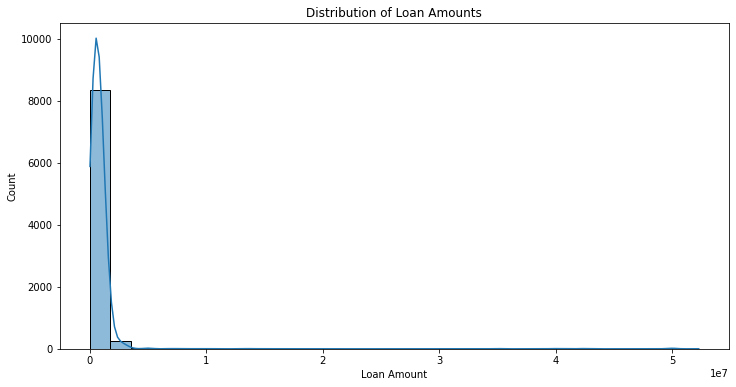

In [11]:
# Visualize the distribution of loan amounts
plt.figure(figsize=(12, 6))
sns.histplot(df['Loan_Amount'], kde=True, bins=30)
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.show()

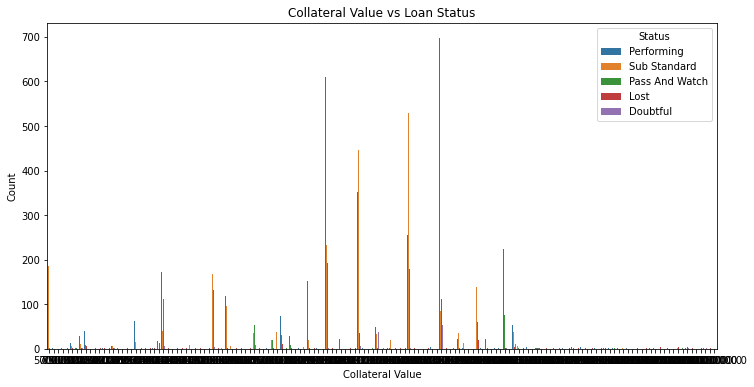

In [12]:
# Visualize the relationship between collateral value and loan status
plt.figure(figsize=(12, 6))
sns.countplot(x='Collateral_Value', hue='Status', data=df)
plt.title('Collateral Value vs Loan Status')
plt.xlabel('Collateral Value')
plt.ylabel('Count')
plt.show()

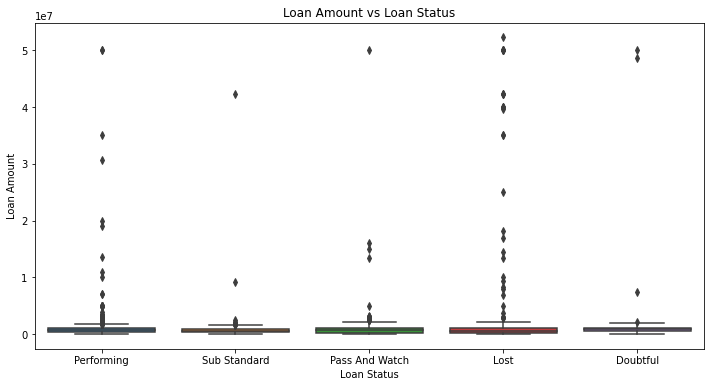

In [13]:
# Visualize the relationship between loan amount and loan status
plt.figure(figsize=(12, 6))
sns.boxplot(x='Status', y='Loan_Amount', data=df)
plt.title('Loan Amount vs Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.show()

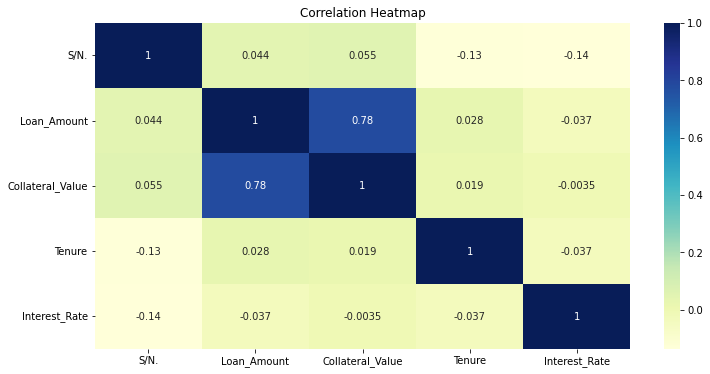

In [14]:
# Checking the correlation between numerical variables
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation Heatmap')
plt.show()

Data Cleaning 

In [15]:
# Remove unnecessary columns
df = df.drop(["S/N.", "Branch", "Region", "Collateral"], axis=1)

In [18]:
# Remove rows with missing values
df = df.dropna()

In [19]:
# Check for missing values
df.isnull().any()

Gender              False
Status              False
Economic_Sector     False
Product             False
Loan_Amount         False
Collateral_Value    False
Tenure              False
Interest_Rate       False
dtype: bool

In [20]:
# Check for duplicates
df.duplicated().sum()  # Check number of duplicated rows
df.drop_duplicates(inplace=True)  # Drop duplicate rows

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5119 entries, 0 to 8650
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            5119 non-null   object 
 1   Status            5119 non-null   object 
 2   Economic_Sector   5119 non-null   object 
 3   Product           5119 non-null   object 
 4   Loan_Amount       5119 non-null   float64
 5   Collateral_Value  5119 non-null   float64
 6   Tenure            5119 non-null   float64
 7   Interest_Rate     5119 non-null   float64
dtypes: float64(4), object(4)
memory usage: 359.9+ KB


Data Preprocessing

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Split the data into training and testing sets
x = df.drop('Status', axis=1)
y = df['Status']

In [23]:
print(df['Gender'].unique())
print(df['Status'].unique())
print(df['Economic_Sector'].unique())
print(df['Product'].unique())

['Female' 'Male']
['Performing' 'Sub Standard' 'Pass And Watch' 'Lost' 'Doubtful']
['Other(Assorted Drinks)' 'Other(PROVISIONS)' 'Other(Textile Materials)'
 'Other(Drinks)' 'Other((DRINKS/PROVISION))' 'Other(Food Stuffs)'
 'Other(BUILDING MATERIALS)' 'Other(HOTELLIER)'
 'Other(PRINTING (INDUSTRIAL DESIGN))' 'Other(Phone and Accessories)'
 'Other(Public Toilet)' 'Consumer Or Personal' 'Education'
 'Other(BANKING)' 'Health' 'Other(Auto Spare Parts)' 'Other(CLOTHING)'
 'Other(TEXTILE MATERIALS)' 'Other(FOOD STUFFS)' 'Other(HOUSEHOLD ITEMS)'
 'Other(PLUMBING MATERIALS)' 'Other(Sales of Wall Clock)'
 'Other(Resturant)' 'Other(Engine Oil)' 'Other(EVENT MANAGEMENT)'
 'Other(CHEMICAL AND ORGANIC PRODUCT)' 'Other(LAUNDRY)'
 'Other(FASHION DESIGNER)' 'Other(Butcher)' 'Other(CATEREER)'
 'Other(FOOTWEARS)' 'Other(Household Wares)' 'Other(Provisions)'
 'Other(CATERING)' 'Other(BLOCK INDUSTRY)' 'Other(RESTAURANT)'
 'Finance Or Insurance' 'Other(Engine Oil and Auto Parts)'
 "Other(Men's Shoes)" 'Othe

In [24]:

# Convert the input data to a pandas DataFrame and specify the column names
x = pd.DataFrame(x, columns=['Gender', 'Status', 'Economic_Sector', 'Product', 'Loan_Amount', 'Collateral_Value', 'Tenure'])

# Encode categorical variables
cat_cols = ['Gender', 'Status', 'Economic_Sector', 'Product']
cat_transformer = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer(transformers=[('cat', cat_transformer, cat_cols)], remainder='passthrough')

# Apply the ColumnTransformer to the input data
x = preprocessor.fit_transform(x)


Data Visualization and Analysis of Cleaned Data

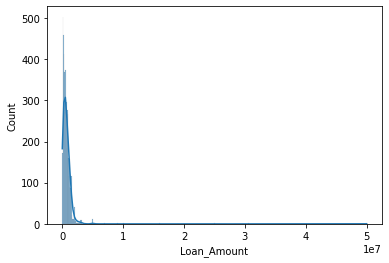

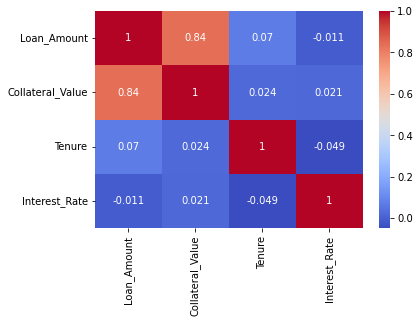

In [25]:
# Plot the distribution of the loan amount
sns.histplot(data=df, x='Loan_Amount', kde=True)
plt.show()

# Plot the correlation matrix of the variables
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


Model Building

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Build a logistic regression model
lr_model = LogisticRegression()

# Build a random forest model
rf_model = RandomForestClassifier()

Model Training and Evaluation

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

# Train and evaluate the logistic regression model
lr_model.fit(x_train, y_train)
y_pred_lr = lr_model.predict(x_test)
print('Logistic Regression Accuracy:', accuracy_score(y_test, y_pred_lr))
print('Logistic Regression Precision:', precision_score(y_test, y_pred_lr, average='weighted'))
print('Logistic Regression Recall:', recall_score(y_test, y_pred_lr, average='weighted'))
print('Logistic Regression F1-score:', f1_score(y_test, y_pred_lr, average='weighted'))

# Train and evaluate the random forest model
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)
print('Random Forest Accuracy:', accuracy_score(y_test, y_pred_rf))
print('Random Forest Precision:', precision_score(y_test, y_pred_rf, average='weighted'))
print('Random Forest Recall:', recall_score(y_test, y_pred_rf, average='weighted'))
print('Random Forest F1-score:', f1_score(y_test, y_pred_rf, average='weighted'))


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression Accuracy: 0.41064453125
Logistic Regression Precision: 0.23791032136926327
Logistic Regression Recall: 0.41064453125
Logistic Regression F1-score: 0.24429126947103572
Random Forest Accuracy: 0.73486328125
Random Forest Precision: 0.7321524562277845
Random Forest Recall: 0.73486328125
Random Forest F1-score: 0.7323610466193495


[[  0   0   0  35   2]
 [  0   0   3 136   3]
 [  0   0   1 409   4]
 [  0   0   2 838   7]
 [  0   0   0 606   2]]


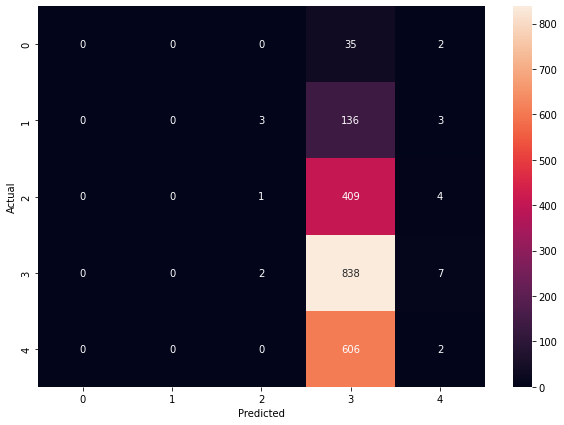

In [36]:
from sklearn.metrics import confusion_matrix

y_pred = lr_model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Hyperparameter Tuning





In [28]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for logistic regression
lr_param_grid = {'C': [0.1, 1, 10]}

# Define the hyperparameter grid for random forest
rf_param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 15]}

# Tune the hyperparameters using grid search
lr_grid_search = GridSearchCV(lr_model, lr_param_grid, cv=5)
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5)


Prediction

In [32]:
# Make predictions on new data using the logistic regression model
x_new = preprocessor.transform(df)
y_pred_lr = lr_model.predict(x_new)

# Make predictions on new data using the random forest model
y_pred_rf = rf_model.predict(x_new)

# Print the predictions
print("Logistic Regression Predictions: ")
print(y_pred_lr)

print("Random Forest Predictions: ")
print(y_pred_rf)

Logistic Regression Predictions: 
['Performing' 'Performing' 'Performing' ... 'Performing' 'Performing'
 'Performing']
Random Forest Predictions: 
['Performing' 'Performing' 'Performing' ... 'Sub Standard' 'Sub Standard'
 'Sub Standard']


Deployment

In [30]:
import pickle

# Save the logistic regression model
with open('lr_model.pkl', 'wb') as file:
    pickle.dump(lr_model, file)

# Save the random forest model
with open('rf_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)


In [31]:
# Load the saved logistic regression model
with open('lr_model.pkl', 'rb') as file:
    lr_model = pickle.load(file)

# Load the saved random forest model
with open('rf_model.pkl', 'rb') as file:
    rf_model = pickle.load(file)


Summary

The output  provided is the predicted loan performance for each application generated by both algorithms. The predicted loan performance is a categorical variable that can take on different values, such as "Performing", "Sub Standard", "Default", etc., depending on the loan's payment status.

In the case of Logistic Regression, all the predicted loan performances are "Performing", indicating that the algorithm has predicted all the loan applications to be in a performing status. This means that according to the Logistic Regression model, all the loan applications are expected to be repaid on time.

In contrast, the Random Forest model has predicted some loan applications to be in a "Sub Standard" category. This suggests that the Random Forest algorithm has identified some loan applications that may not be performing well and may be at risk of default.

It is important to note that the accuracy and reliability of these predictions depend on the quality of the data and the machine learning algorithms used. Therefore, it is essential to evaluate the performance of the models using appropriate metrics and techniques and refine them as necessary.